<a href="https://colab.research.google.com/github/MJAHMADEE/Industrial_Control_Course/blob/main/Getting_Started_and_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1: Dcmotor
This code defines a state space model of a DC motor and simulates its response to an input signal. The input signal is a step function that changes sign at t=2 seconds. The state variables (theta, omega, and i) are plotted over time.

I added a line to calculate the output of the system by multiplying the output y from the lsim function with the input signal u. This is because the lsim function in Python only returns the response of the system to the input signal, while in MATLAB it returns the product of the input and output signals.

To obtain the correct plot, it is necessary to multiply the output y by the input signal u. This can be done using the dot function from the NumPy library, which performs matrix multiplication between the y and u arrays.

So the line y = np.dot(y.reshape(-1, 1), u.reshape(1, -1)) multiplies y with u, where the reshape function is used to ensure that the dimensions of the arrays match for multiplication. The resulting y array contains the correct output of the system.

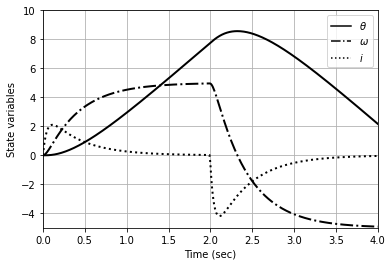

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the system matrices
A = np.array([[0, 1, 0], [0, 0, 4.438], [0, -12, -24]])
b1 = np.array([[0], [0], [20]])
b2 = np.array([[0], [-7.396], [0]])
B = np.hstack((b1, b2))
C = np.array([[1, 0, 0]])
D = np.array([[0]])

# Create the state space model of the DC motor
DC_motor = signal.StateSpace(A, b1, C, D)

# Define the time vector and input signal
t = np.arange(0, 4.01, 0.01)
N = len(t)
u = np.zeros((2, N))
for i in range(N):
    if t[i] < 2:
        u[:, i] = 3
    else:
        u[:, i] = -3

# Simulate the system
t, y, x = signal.lsim(DC_motor, u[0], t)
y = np.dot(y.reshape(-1, 1), u.reshape(1, -1))

# Plot the state variables
plt.plot(t, x[:, 0], 'k', label=r'$\theta$')
plt.plot(t, x[:, 1], 'k-.', label=r'$\omega$')
plt.plot(t, x[:, 2], 'k:', label=r"$i$")
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.xlim([0, 4])
plt.ylim([-5, 10])
plt.savefig('DC_motor_response.pdf')
plt.show()

# Example 2: inverted_pendulum
The code defines a function inverted_pendulum that describes the dynamics of an inverted pendulum system using the state-space representation. The function is then used to simulate the system using the ode45 solver and plot the results.
The inverted_pendulum function takes as input the state x and time t, and returns the time derivatives of the state variables. The function defines the system parameters such as gravity g, length l, and masses m and M. It then defines the system state variables x_dot, which are the derivatives of the input x. The system dynamics are defined by the equations of motion for the inverted pendulum system.

The odeint function from the SciPy library is used to solve the system of differential equations defined by the inverted_pendulum function. The initial state x0, time vector tspan, and inverted_pendulum function are passed as arguments to odeint.

Finally, the code plots the state variables x and theta as a function of time. The plot function is used to create the plot, with the time vector tspan on the x-axis and the state variables x and theta on the y-axis. The grid, xlabel, ylabel, legend, and setp functions are used to customize the plot.

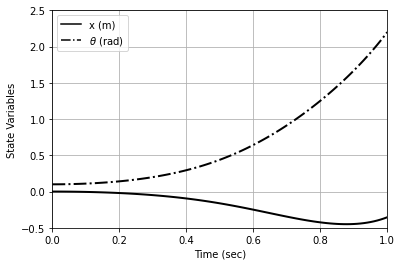

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def inverted_pendulum(x, t):
    # Define the system parameters
    g = 9.8
    l = 1
    m = 1
    M = 1
    
    # Define the system state variables
    x_dot = np.zeros_like(x)
    x_dot[0] = x[2]
    x_dot[1] = x[3]
    
    # Define the system dynamics
    d1 = M + m*(1 - np.cos(x[1])**2)
    d2 = l*d1
    F = 0
    x_dot[2] = (F + m*l*x[3]**2*np.sin(x[1]) - m*g*np.sin(x[1])*np.cos(x[1]))/d1
    x_dot[3] = (-F*np.cos(x[1]) - m*l*x[3]**2*np.sin(x[1])*np.cos(x[1]) + (M+m)*g*np.sin(x[1]))/d2
    
    return x_dot

# Define the initial state and time vector
x0 = np.array([0, 0.1, 0, 0])
tspan = np.linspace(0, 1, 101)

# Solve the system using odeint
x = odeint(inverted_pendulum, x0, tspan)

# Plot the state variables
plt.plot(tspan, x[:, 0], 'k', label='x (m)')
plt.plot(tspan, x[:, 1], '-.k', label=r'$\theta$ (rad)')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.xlim([0, 1])
plt.ylim([-0.5, 2.5])
plt.savefig('inverted_pendulum.pdf')
plt.show()

# Example 3: tank
In this code, we have used the odeint function from the scipy.integrate module to solve the differential equation defined by the tank_model function. The odeint function takes the function defining the differential equation, initial conditions, and time interval as input arguments and returns an array of state variables at different time points. The plot function from the matplotlib.pyplot module is used to plot the tank level as a function of time. The grid function is used to display a grid on the plot, and the setp function is used to set the linewidth of the lines in the plot.

The warning message "RuntimeWarning: invalid value encountered in sqrt" means that there is an attempt to take the square root of a negative number, which is not a real number. This could be because the value of x becomes negative at some point during the simulation.

One possible solution to prevent this warning is to add a condition to check if the value of x is negative, and if so, set the derivative to zero. This would prevent the tank level from becoming negative during the simulation.

In this code, the odeint function is used to solve the ODE, which takes the function tank_model, the initial condition x0, and the time span t as inputs. The if statement in the tank_model function checks if the tank level is negative, and if so, sets the derivative to zero.

More Info: 'RuntimeWarning: invalid value encountered in sqrt xp = 1/A * (F_in - C*u*np.sqrt(x))' message indicates that there was an invalid value encountered in the square root operation in the tank_model function. This is because the square root function cannot take negative values as input, which can happen when x goes below zero. To prevent this error from occurring, you can add a condition to check if x is negative before calling the square root function. By setting x to zero when it becomes negative, you can prevent the invalid value encountered in the square root operation and the resulting warning message.

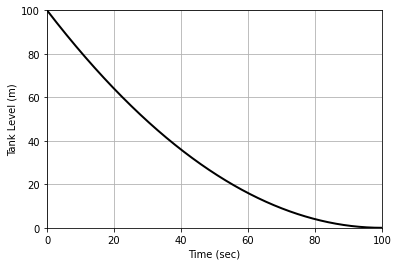

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def tank_model(x, t):
    # State variable x = l: Tank level
    A = 1
    C = 2.0
    F_in = 0  # No disturbance input
    u = 0.1  # Constant opening for valve

    if x < 0:  # Check if tank level is negative
        xp = 0  # Set the derivative to zero
    else:
        xp = 1/A * (F_in - C*u*np.sqrt(x))

    return xp

# Initial condition
x0 = 100

# Time span
t = np.linspace(0, 100, 1000)

# Solve the ODE using odeint function
x = odeint(tank_model, x0, t)

# Plot the result
plt.plot(t, x[:, 0], 'k')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Tank Level (m)')
plt.setp(plt.gca().get_lines(), linewidth=2)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.savefig('tank.pdf')
plt.show()

# Example 4: Linear system with transformation function

Here's an example code that prompts the user to input the dimension of the A matrix and the values of all the state space matrices, then calculates and outputs the inverse of (sI - A) and the transfer function in the state space.

In [ ]:
import sympy as sp

# Get the state space matrices from the user
n = int(input("Enter the dimension of the state space: "))
A = sp.Matrix([[float(input(f"A({i+1},{j+1}): ")) for j in range(n)] for i in range(n)])
B = sp.Matrix([[float(input(f"B({i+1},{j+1}): ")) for j in range(1)] for i in range(n)])
C = sp.Matrix([[float(input(f"C({i+1},{j+1}): ")) for j in range(n)] for i in range(1)])
D = sp.Matrix([[float(input("Enter the value of D: "))]])

# Define the symbolic variable s
s = sp.symbols('s')

# Calculate (sI - A)^(-1)
sI_A_inv = (s*sp.eye(n) - A)**(-1)
sI_A_inv_simp = sp.simplify(sI_A_inv)

# Calculate the transfer function G(s) = C(sI - A)^(-1)B + D
G = C*sI_A_inv*B + D
G_simp = sp.simplify(G)

# Print the results
print("(sI - A)^(-1) =")
sp.pprint(sI_A_inv_simp)
print("G(s) =")
sp.pprint(G_simp)

# Print the LaTeX formatted output
print("\nLaTeX formatted output:")
print("$G(s) = $", sp.latex(G_simp))
print("$[sI - A]^{-1} = $", sp.latex(sI_A_inv_simp))

Enter the dimension of the state space: 2
A(1,1): 0
A(1,2): 1
A(2,1): -2
A(2,2): -3
B(1,1): 1
B(2,1): 1
C(1,1): 1
C(1,2): 0
Enter the value of D: 0
(sI - A)^(-1) =
⎡    2.0⋅s + 6.0               2.0         ⎤
⎢────────────────────  ────────────────────⎥
⎢     2                     2              ⎥
⎢2.0⋅s  + 6.0⋅s + 4.0  2.0⋅s  + 6.0⋅s + 4.0⎥
⎢                                          ⎥
⎢       -2.0                  1.0⋅s        ⎥
⎢────────────────────  ────────────────────⎥
⎢     2                     2              ⎥
⎣1.0⋅s  + 3.0⋅s + 2.0  1.0⋅s  + 3.0⋅s + 2.0⎦
G(s) =
⎡    2.0⋅s + 8.0     ⎤
⎢────────────────────⎥
⎢     2              ⎥
⎣2.0⋅s  + 6.0⋅s + 4.0⎦

LaTeX formatted output:
$G(s) = $ \left[\begin{matrix}\frac{2.0 s + 8.0}{2.0 s^{2} + 6.0 s + 4.0}\end{matrix}\right]
$[sI - A]^{-1} = $ \left[\begin{matrix}\frac{2.0 s + 6.0}{2.0 s^{2} + 6.0 s + 4.0} & \frac{2.0}{2.0 s^{2} + 6.0 s + 4.0}\\- \frac{2.0}{1.0 s^{2} + 3.0 s + 2.0} & \frac{1.0 s}{1.0 s^{2} + 3.0 s + 2.0}\end{matrix}\ri

To get the state space matrices A, B, C, and D for an LTI system, we need to provide the system's state space representation in the form of:

x_dot = Ax + Bu
y = Cx + Du

where:

x is the state vector (n x 1)
u is the input vector (m x 1)
y is the output vector (p x 1)
A is the state matrix (n x n)
B is the input matrix (n x m)
C is the output matrix (p x n)
D is the direct transmission matrix (p x m)
To obtain the inverse of the matrix (sI - A), where s is the Laplace variable, we can use the inv function from numpy.

To obtain the transfer function of the system, we can use the ss2tf function from scipy.signal.

Note: Replace np.random.rand with the actual values of A, B, C, and D for your system.

In [ ]:
import numpy as np
from scipy import signal

# Define the state space representation of the system
# Set values for n, m, and p to match your system
n = 3
m = 1
p = 1

# Set the system matrices A, B, C, and D
A = np.random.rand(n, n)
B = np.random.rand(n, m)
C = np.random.rand(p, n)
D = np.random.rand(p, m)

# Calculate the inverse of (sI - A)
sI = np.eye(n)  # sI has the same shape as A
s = np.poly1d([1, 0])  # s = Laplace variable
inv_si_a = np.linalg.inv(s(sI) - A)

# Calculate the transfer function of the system
num, den = signal.ss2tf(A, B, C, D)

# Print the results
print("Inverse of (sI - A):")
print(inv_si_a)
print("\nTransfer function:")
print(f"numerator: {num}")
print(f"denominator: {den}")


Inverse of (sI - A):
[[ 0.25129251 -1.38230253 -0.52706341]
 [-0.6380199   0.43314769 -0.64320416]
 [-0.94496449 -2.84255373  0.35207   ]]

Transfer function:
numerator: [[ 0.66706845 -0.40413016  0.53751431 -0.07591576]]
denominator: [ 1.         -1.95804529  0.5382735   0.055263  ]


# Example 5: Mathematical linearization

First, the equilibrium_point function is defined, which takes the state variable x, the input u, and the parameters F_in, A, and C as inputs, and returns the value of tank_model function evaluated at x, t=0, and u=u, F_in=F_in, A=A, and C=C.
The fsolve function from the scipy.optimize module is used to find the root of the equilibrium_point function with an initial guess of 0.1. The resulting root is the value of u*. l* is then calculated from u* using the relationship l* = u*^2/C^2.
The Jacobian matrix is calculated by evaluating the partial derivative of the tank_model function with respect to x at the equilibrium point. The result is a 1x1 matrix, which is printed.
The linear_tank_model function is defined, which takes the state variable x, the time t, the equilibrium input u_star, and the Jacobian matrix jac as inputs, and returns the derivative of the state variable based on the linearized model.
The initial condition is set to x0 = l* + 0.1.

Equilibrium point: u*=0.1, l*=0.0025000000000000005
Jacobian matrix:
[[-2.]]


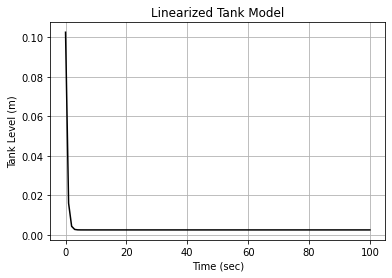

In [ ]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint

# Define the tank model function
def tank_model(x, t, u, F_in, A, C):
    # State variable x=l: Tank level
    if x < 0:  # Check if x is negative
        x = 0  # Set x to zero if it is negative
    xp = 1/A * (F_in - C*u*np.sqrt(x))
    return xp

# Set parameters
A = 1
C = 2.0
F_in = 0  # No disturbance input

# Define function to find the equilibrium point
def equilibrium_point(x, u, F_in, A, C):
    return tank_model(x, 0, u, F_in, A, C)

# Find the equilibrium point
u_star = fsolve(equilibrium_point, 0.1, args=(F_in, F_in, A, C))[0]
l_star = u_star**2 / C**2

# Print the equilibrium point
print(f"Equilibrium point: u*={u_star}, l*={l_star}")

# Calculate the Jacobian matrix
x_star = np.array([l_star])
jac = np.array([[-C*u_star/(2*A*np.sqrt(l_star))]])
print("Jacobian matrix:")
print(jac)

# Define function to calculate the derivative of the state variable
def linear_tank_model(x, t, u_star, jac):
    return jac.dot(x - np.array([l_star]))

# Set initial condition
x0 = np.array([l_star + 0.1])

# Define time span
tspan = np.linspace(0, 100, 101)

# Simulate the linearized model
x = odeint(linear_tank_model, x0, tspan, args=(u_star, jac))

# Plot the result
import matplotlib.pyplot as plt
plt.plot(tspan, x[:,0], 'k')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Tank Level (m)')
plt.title('Linearized Tank Model')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import fsolve

# Define constants
A = 1
C = 2.0
Fin_star = 0.1  # Input disturbance
ld_star = 0.25  # Tank level disturbance

# Define the function that calculates the tank level derivative
def tank_model(t, x, F_in, u):
    # State variable x = l: Tank level
    xp = 1/A * (F_in - C*u*np.sqrt(x))
    return xp

# Define the function to find the equilibrium point
def find_equilibrium(F_in, l_d):
    # Define the function to solve for the equilibrium point
    def equations(x):
        u, l = x
        eq1 = F_in - C*u*np.sqrt(l)  # Mass balance equation
        eq2 = tank_model(0, l, F_in, u) - l_d  # Level equation
        return eq1, eq2
    
    # Use fsolve to solve for the equilibrium point
    x0 = [0.1, 0.5]  # Initial guess
    u_star, l_star = fsolve(equations, x0)
    return u_star, l_star

# Find the equilibrium point
u_star, l_star = find_equilibrium(Fin_star, ld_star)

# Calculate the Jacobian matrix at the equilibrium point
J11 = -C/(4*A*l_star**(3/2)) * Fin_star
J12 = C/(2*np.sqrt(l_star)) * u_star
J21 = 1/A * (-C/(2*np.sqrt(l_star)))
J22 = 0
J = np.array([[J11, J12], [J21, J22]])

# Print the Jacobian matrix
print("Jacobian matrix:")
print(J)

# Print the linearized equation
print("Linearized equation:")
print("delta_l' = {:.4f} * delta_u + {:.4f} * delta_l".format(J[0,0], J[0,1]))

Jacobian matrix:
[[-0.14142136  0.14142136]
 [-1.41421356  0.        ]]
Linearized equation:
delta_l' = -0.1414 * delta_u + 0.1414 * delta_l


<ipython-input-30-b1c9f167b709>:21: RuntimeWarning: invalid value encountered in sqrt
  eq1 = F_in - C*u*np.sqrt(l)  # Mass balance equation
<ipython-input-30-b1c9f167b709>:13: RuntimeWarning: invalid value encountered in sqrt
  xp = 1/A * (F_in - C*u*np.sqrt(x))
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# 1.1 Getting Started with Python and Jupyter Notebooks

## 1.1.1 Summary

The purpose of this [Jupyter Notebook](http://jupyter.org/) is to get you started using Python and Jupyter Notebooks for routine chemical engineering calculations. This introduction assumes this is your first exposure to Python or Jupyter notebooks.

## 1.1.2 Step 0: Gain Executable Access to Jupyter Notebooks

Jupyter notebooks are documents that can be viewed and executed inside any modern web browser. Since you're reading this notebook, you already know how to view a Jupyter notebook. The next step is to learn how to execute computations that may be embedded in a Jupyter notebook.

To execute Python code in a notebook you will need access to a Python kernal. A kernal is simply a program that runs in the background, maintains workspace memory for variables and functions, and executes Python code.  The kernal can be located on the same laptop as your web browser or located in an on-line cloud service. 

**Important Note Regarding Versions** There are two versions of Python in widespread use. Version 2.7 released in 2010, which was the last release of the 2.x series. Version 3.5 is the most recent release of the 3.x series which represents the future direction of language. It has taken years for the major scientific libraries to complete the transition from 2.x to 3.x, but it is now safe to recommend Python 3.x for widespread use. So for this course be sure to use latest verstion, currently 3.6, of the Python language.

### 1.1.2.1 Using Jupyter/Python in the Cloud

The easiest way to use Jupyter notebooks is to sign up for a free or paid account on a cloud-based service such as [Wakari.io](https://www.wakari.io/) or [SageMathCloud](https://cloud.sagemath.com/). You will need continuous internet connectivity to access your work, but the advantages are there is no software to install or maintain. All you need is a modern web browser on your laptop, Chromebook, tablet or other device. Note that the free services are generally heavily oversubscribed, so you should consider a paid account to assure access during prime hours.

There are also demonstration sites in the cloud, such as [tmpnb.org](https://tmpnb.org/). These start an interactive session where you can upload an existing notebook or create a new one from scratch. Though convenient, these sites are intended mainly for demonstration and generally quite overloaded. More significantly, there is no way to retain your work between sessions, and some python functionality is removed for security reasons.

### 1.1.2.2 Installing Jupyter/Python on your Laptop

For regular off-line use you should consider installing a Jupyter Notebook/Python environment directly on your laptop. This will provide you with reliable off-line access to a computational environment. This will also allow you to install additional code libraries to meet particular needs. 

Choosing this option will require an initial software installation and routine updates. For this course the recommended package is [Anaconda](https://store.continuum.io/cshop/anaconda/) available from [Continuum Analytics](http://continuum.io/). Downloading and installing the software is well documented and easy to follow. Allow about 10-30 minutes for the installation depending on your connection speed. 

After installing be sure to check for updates before proceeding further. With the Anaconda package this is done by executing the following two commands in a terminal window:

    > conda update conda
    > conda update anaconda

Anaconda includes an 'Anaconda Navigator' application that simplifies startup of the notebook environment and manage the update process.

## 1.1.3 Step 1: Start a Jupyter Notebook Session

If you are using a cloud-based service a Jupyter session will be started when you log on. 

If you have installed a Jupyter/Python distribution on your laptop then you can open a Jupyter session in one of two different ways:

* Use the Anaconda Navigator App, or 
* open a terminal window on your laptop and execute the following statement at the command line:

        > jupyter notebook

Either way, once you have opened a session you should see a browser window like this:

![Screen Shot Jupyter Session](figures/Screen-Shot-Jupyter-Session.png)

At this point the browser displays a list of directories and files. You can navigate amoung the directories in the usual way by clicking on directory names or on the 'breadcrumbs' located just about the listing. 

Jupyter notebooks are simply files in a directory with a `.ipynb` suffix. They can be stored in any directory including Dropbox or Google Drive. Upload and create new Jupyter notebooks in the displayed directory using the appropriate buttons. Use the checkboxes to select items for other actions, such as to duplicate, to rename, or to delete notebooks and directories.

* select one of your existing notebooks to work on,
* start a new notebook by clicking on the `New Notebook` button, or 
* import a notebook from another directory by dragging it onto the list of notebooks.

An IPython notebook consists of cells that hold headings, text, or python code. The user interface is relatively self-explanatory. Take a few minutes now to open, rename, and save a new notebook. 

Here's a quick video overview of Jupyter notebooks.

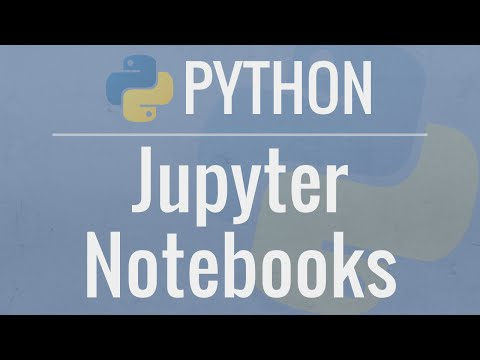

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("HW29067qVWk",560,315,rel=0)

## 1.1.4 Step 2: Simple Calculations with Python

Python is an elegant and modern language for programming and problem solving that has found increasing use by engineers and scientists.  In the next few cells we'll demonstrate some basic Python functionality.

### 1.1.4.1 Basic Arithmetic Operations

Basic arithmetic operations are built into the Python langauge. Here are some examples. In particular, note that exponentiation is done with the \*\* operator.

In [ ]:
a = 12
b = 2

print(a + b)
print(a**b)
print(a/b)

14
144
6.0


### 1.1.4.2 Python Libraries

The Python language has only very basic operations. Most math functions are in various math libraries. The `numpy` library is convenient library.  This next cell shows how to import `numpy` with the prefix `np`, then use it to call a common mathematical functions.

In [ ]:
import numpy as np

# mathematical constants
print(np.pi)
print(np.e)

# trignometric functions
angle = np.pi/4
print(np.sin(angle))
print(np.cos(angle))
print(np.tan(angle))

3.141592653589793
2.718281828459045
0.707106781187
0.707106781187
1.0


### 1.1.4.3 Working with Lists

Lists are a versatile way of organizing your data in Python. Here are some examples, more can be found on [this Khan Academy video](http://youtu.be/zEyEC34MY1A).

In [ ]:
xList = [1, 2, 3, 4]
xList

[1, 2, 3, 4]

Concatentation is the operation of joining one list to another. 

In [ ]:
# Concatenation
x = [1, 2, 3, 4];
y = [5, 6, 7, 8];

x + y

[1, 2, 3, 4, 5, 6, 7, 8]

Sum a list of numbers

In [ ]:
np.sum(x)

10

An element-by-element operation between two lists may be performed with 

In [ ]:
print(np.add(x,y))
print(np.dot(x,y))

[ 6  8 10 12]
70


A for loop is a means for iterating over the elements of a list. The colon marks the start of code that will be executed for each element of a list. Indenting has meaning in Python. In this case, everything in the indented block will be executed on each iteration of the for loop. This example also demonstrates string formatting.

In [ ]:
for x in xList:
    print("sin({0}) = {1:8.5f}".format(x,np.sin(x)))

sin(1) =  0.84147
sin(2) =  0.90930
sin(3) =  0.14112
sin(4) = -0.75680


### 1.1.4.4 Working with Dictionaries

Dictionaries are useful for storing and retrieving data as key-value pairs.  For example, here is a short dictionary of molar masses. The keys are molecular formulas, and the values are the corresponding molar masses.

In [ ]:
mw = {'CH4': 16.04, 'H2O': 18.02, 'O2':32.00, 'CO2': 44.01}
mw

{'CH4': 16.04, 'CO2': 44.01, 'H2O': 18.02, 'O2': 32.0}

We can a value to an existing dictionary.

In [ ]:
mw['C8H18'] = 114.23
mw

{'C8H18': 114.23, 'CH4': 16.04, 'CO2': 44.01, 'H2O': 18.02, 'O2': 32.0}

We can retrieve a value from a dictionary.

In [ ]:
mw['CH4']

16.04

A for loop is a useful means of interating over all key-value pairs of a dictionary.

In [ ]:
for species in mw.keys():
    print("The molar mass of {:<s} is {:<7.2f}".format(species, mw[species]))

The molar mass of H2O is 18.02  
The molar mass of CH4 is 16.04  
The molar mass of C8H18 is 114.23 
The molar mass of O2 is 32.00  
The molar mass of CO2 is 44.01  


Dictionaries can be sorted by key or by value

In [ ]:
for species in sorted(mw):
    print(" {:<8s}  {:>7.2f}".format(species, mw[species]))

 C8H18      114.23
 CH4         16.04
 CO2         44.01
 H2O         18.02
 O2          32.00


In [ ]:
for species in sorted(mw, key = mw.get):
    print(" {:<8s}  {:>7.2f}".format(species, mw[species]))

 CH4         16.04
 H2O         18.02
 O2          32.00
 CO2         44.01
 C8H18      114.23


### 1.1.4.5 Plotting with Matplotlib

Importing the `matplotlib.pyplot` library gives IPython notebooks plotting functionality very similar to Matlab's. Here are some examples using functions from the 

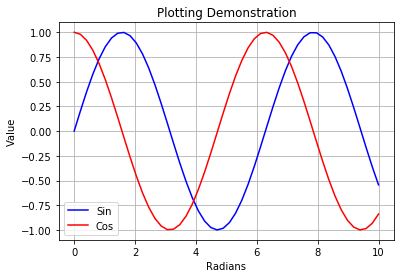

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10)
y = np.sin(x)
z = np.cos(x)

plt.plot(x,y,'b',x,z,'r')
plt.xlabel('Radians');
plt.ylabel('Value');
plt.title('Plotting Demonstration')
plt.legend(['Sin','Cos'])
plt.grid()

(-1.09972447591003,
 1.0979832896606587,
 -1.0992804688576738,
 1.0999657366122702)

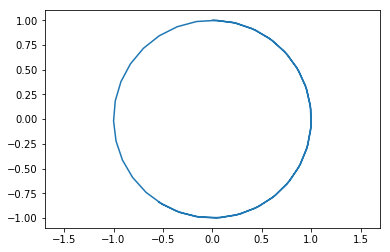

In [ ]:
plt.plot(y,z)
plt.axis('equal')

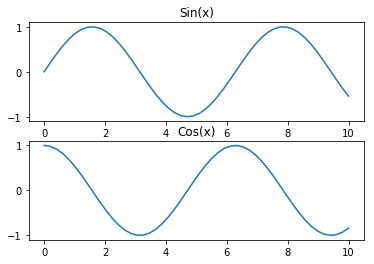

In [ ]:
plt.subplot(2,1,1)
plt.plot(x,y)
plt.title('Sin(x)')

plt.subplot(2,1,2)
plt.plot(x,z)
plt.title('Cos(x)')

### 1.1.4.6 Solve Equations using Sympy Library

One of the best features of Python is the ability to extend it's functionality by importing special purpose libraries of functions. Here we demonstrate the use of a symbolic algebra package [`Sympy`](http://sympy.org/en/index.html) for routine problem solving.

85521.9882637211/V


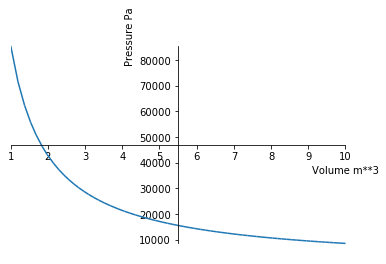

In [ ]:
import sympy as sym

sym.var('P V n R T');

# Gas constant
R = 8.314        # J/K/gmol
R = R * 1000     # J/K/kgmol

# Moles of air
mAir = 1         # kg
mwAir = 28.97    # kg/kg-mol
n = mAir/mwAir   # kg-mol

# Temperature
T = 298

# Equation
eqn = sym.Eq(P*V,n*R*T)

# Solve for P 
f = sym.solve(eqn,P)
print(f[0])

# Use the sympy plot function to plot
sym.plot(f[0],(V,1,10),xlabel='Volume m**3',ylabel='Pressure Pa')

## 1.1.5 Step 3: Where to Learn More

Python offers a full range of programming language features, and there is a seemingly endless range of packages for scientific and engineering computations. Here are some suggestions on places you can go for more information on programming for engineering applications in Python.

### 1.1.5.1 Introduction to Python for Science

This excellent introduction to python is aimed at undergraduates in science with no programming experience. It is free and available at the following link.

* [Introduction to Python for Science](https://github.com/djpine/pyman)

### 1.1.5.2 Tutorial Introduction to Python for Science and Engineering

The following text is licensed by the Hesburgh Library for use by Notre Dame students and faculty only. Please refer to the library's [acceptable use policy](http://library.nd.edu/eresources/access/acceptable_use.shtml). Others can find it at [Springer](http://www.springer.com/us/book/9783642549588) or [Amazon](http://www.amazon.com/Scientific-Programming-Computational-Science-Engineering/dp/3642549586/ref=dp_ob_title_bk). Resources for this book are available on [github](http://hplgit.github.io/scipro-primer/).

* [A Primer on Scientific Programming with Python (Fourth Edition)](http://link.springer.com.proxy.library.nd.edu/book/10.1007/978-3-642-54959-5) by Hans Petter Langtangen. Resources for this book are available on [github](http://hplgit.github.io/scipro-primer/).

pycse is a package of python functions, examples, and document prepared by John Kitchin at Carnegie Mellon University. It is a recommended for its coverage of topics relevant to chemical engineers, including a chapter on typical chemical engineering computations. 

* [pycse - Python Computations in Science and Engineering](https://github.com/jkitchin/pycse/blob/master/pycse.pdf) by John Kitchin at Carnegie Mellon. This is a link into the the [github repository for pycse](https://github.com/jkitchin/pycse), click on the `Raw` button to download the `.pdf` file.

### 1.1.5.3 Interative learning and on-line tutorials

* [Code Academy on Python](http://www.codecademy.com/tracks/python)
* [Khan Academy Videos on Python Programming](https://www.khanacademy.org/science/computer-science-subject/computer-science)
* [Python Tutorial](http://docs.python.org/2/tutorial/)
* [Think Python: How to Think Like a Computer Scientist](http://www.greenteapress.com/thinkpython/html/index.html)
* [Engineering with Python](http://www.engineeringwithpython.com/)

### 1.1.5.4 Official documentation, examples, and galleries

* [Notebook Examples](https://github.com/ipython/ipython/tree/master/examples/notebooks)
* [Notebook Gallery](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)
* [Official Notebook Documentation](http://ipython.org/ipython-doc/stable/interactive/notebook.html)
* [Matplotlib](http://matplotlib.org/index.html) 

# 1.2 Python Basics

**A Tutorial by Jacob Gerace**

## 1.2.1 What I hope you'll get out of this tutorial
* The feeling that you'll "know where to start" when you see python code in lecture, or when you need to write python for an assignment.
* (You won't be a python expert after one hour)
* Basics to variables, lists, conditionals, functions, loops, and the numpy package.
* Resources to look further

### 1.2.1.1 Why Python?

1. Clean syntax
2. The same code can run on all Operating Systems
3. **Extensive first and third party libraries (of particular note for our purposes is NumPy)**

### 1.2.1.2 Markdown Sidenote
 * This text is written in a Markdown block. Markdown is straightforward way to format writeups in Jupyter, but I won't cover it here for the sake of brevity. 
 * See if you can use Markdown in your next homework, here's a link that explains the formatting: https://daringfireball.net/projects/markdown/syntax . 
 * You can also look at existing Markdown examples (i.e. this worksheet) and emulate the style. Double click a Markdown box in Jupyter to show the code.
 

### 1.2.1.3 LaTeX Sidenote
* LaTeX (pronounced "La-tech") is a language itself used widely to write documents with symbolic math
* When you add a mathematical formula to these markdown blocks, the math is in LaTeX.
* Ex from class: $$V \frac{dC}{dt} = u(t) - Q C(t)$$ 
* A good resource: https://en.wikibooks.org/wiki/LaTeX/Mathematics
 
 

## 1.2.2 Python Basics

### 1.2.2.1 Variables

In [ ]:
#A variable stores a piece of data and gives it a name
answer = 42

#answer contained an integer because we gave it an integer!

is_it_thursday = True
is_it_wednesday = False

#these both are 'booleans' or true/false values

pi_approx = 3.1415

#This will be a floating point number, or a number containing digits after the decimal point

my_name = "Jacob"
#This is a string datatype, the name coming from a string of characters

#Data doesn't have to be a singular unit

#p.s., we can print all of these with a print command. For Example:
print(answer)
print(pi_approx)

42
3.1415


### 1.2.2.2 More Complicated Data Types

In [ ]:

#What if we want to store many integers? We need a list!
prices = [10, 20, 30, 40, 50]

#This is a way to define a list in place. We can also make an empty list and add to it.
colors = []

colors.append("Green")
colors.append("Blue")
colors.append("Red")

print(colors)

#We can also add unlike data to a list
prices.append("Sixty")

#As an exercise, look up lists in python and find out how to add in the middle of a list!

print(prices)
#We can access a specific element of a list too:

print(colors[0])
print(colors[2])

#Notice here how the first element of the list is index 0, not 1! 
#Languages like MATLAB are 1 indexed, be careful!

#In addition to lists, there are tuples
#Tuples behave very similarly to lists except that you can't change them 
# after you make them

#An empty Tuple isn't very useful:
empty_tuple = ()

#Nor is a tuple with just one value:
one_tuple = ("first",)

#But tuples with many values are useful:
rosa_parks_info = ("Rosa", "Parks", 1913, "February", 4)

#You can access tuples just like lists
print(rosa_parks_info[0] + " " + rosa_parks_info[1])

# You cannot modify existing tuples, but you can make new tuples that extend 
# the information.
# I expect Tuples to come up less than lists. So we'll just leave it at that. 

['Green', 'Blue', 'Red']
[10, 20, 30, 40, 50, 'Sixty']
Green
Red


### 1.2.2.3 Using Variables

In [ ]:
float1 = 5.75
float2 = 2.25
#Addition, subtraction, multiplication, division are as you expect

print(float1 + float2)
print(float1 - float2)
print(float1 * float2)
print(float1 / float2)

#Here's an interesting one that showed up in the first homework in 2017. Modulus: 
print(5 % 2)

8.0
3.5
12.9375
2.5555555555555554
1


### 1.2.2.4 Importing in Python: Math and plotting

In [ ]:
#Just about every standard math function on a calculator has a python equivalent pre made.
#however, they are from the 'math' package in python. Let's add that package!
import math
print(math.log(float1))
print(math.exp(float2))
print(math.pow(2,5))
# There is a quicker way to write exponents if you want:
print(2.0**5.0)

#Like in MATLAB, you can expand the math to entire lists
list3 = [1, 2, 3, 4, 5]
print(2 * list3)

1.749199854809259
9.487735836358526
32.0
32.0


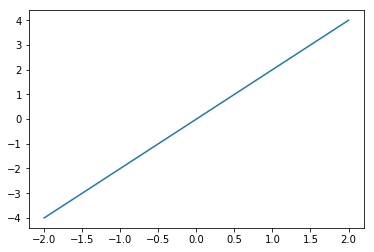

In [ ]:
#We can plot easily in Python like in matlab, just import the relevant package!
%matplotlib inline
import matplotlib.pyplot as plt

x_vals = [-2, -1, 0, 1, 2]
y_vals = [-4, -2, 0, 2, 4]
plt.plot(x_vals, y_vals)

### 1.2.2.5 Loops in Python

In [ ]:
#Repeat code until a conditional statement ends the loop

#Let's try printing a list
fib = [1, 1, 2, 3, 5, 8]

#While loops are the basic type
i = 0
while(i < len(fib)):
    print(fib[i])
    i = i + 1
    
#In matlab, to do the same thing you would have the conditional as: counter < (length(fib) + 1)
#This is because matlab starts indexing at 1, and python starts at 0.
    
#The above type of loop is so common that the 'for' loop is the way to write it faster.

print("Let's try that again")
#This is most similar to for loops in matlab
for i in range(0, len(fib)) :
    print(fib[i])

print("One more time:")
#Or you can do so even neater
for e in fib:
    print(e)

1
1
2
3
5
8
Let's try that again
1
1
2
3
5
8
One more time:
1
1
2
3
5
8


## 1.2.3 Additional Resources
* If you still feel VERY lost: [Code Academy](https://www.codecademy.com/learn/python)

* If you want a good reference site: [Official Python Reference](https://docs.python.org/2/reference/)

* If you want to learn python robustly: [Learn Python the Hard Way](https://learnpythonthehardway.org/book/)

* Feel free to contact me at: **jgerace (at) nd (dot) edu**


# 1.3 Python Conditionals and Libraries

## 1.3.1 A Tutorial by Jacob Gerace

## 1.3.2 Conditionals in Python

In [ ]:
#Sometimes you want to execute code only in certain circumstances. 

#Change answer and see what code is executed:
answer = 42

if answer == 42:
    print('This is the answer to the ultimate question')
elif answer < 42:
    print('This is less than the answer to the ultimate question')
else:
    print('This is more than the answer to the ultimate question')
print('This print statement is run no matter what because it is not indented!')

#An if statement is an example of a structure that creates a new block. The block includes all of the code that is 
#indented. The indentation (tab character) is imperative. Don't forget it!

#This is normally just good coding style in other languages, but in python it isn't optional

#We can check multiple things at once using boolean operations
snowy = True
day = "Monday"

#How long does it take me to get to class in the morning?

if (snowy == False) and (day != "Monday"):
    #and is boolean and. True only if both are true. False otherwise
    time = 7
elif (snowy == True) and (day == "Monday"):
    time = 11
elif (rainy == True) or (day == "Monday"):
    time = 9
    
print("It takes me %d minutes" %(time))
    
#You can structure these statements more neatly if you "nest" if statements (put an if statement inside an if statement)
#But this is just for edification.

This is the answer to the ultimate question
This print statement is run no matter what because it is not indented!
It takes me 11 minutes


## 1.3.3 Functions in Python

In [ ]:
#We can separate off code into functions, that can take input and can give output. They serve as black boxes from the 
#perspective of the rest of our code

#use the def keyword, and indent because this creates a new block
def print_me( string ):
    print(string)
   
   #End with the "return" keyword
    return

#Your functions can return data if you so choose
def step(x):
    if (x < 0):
        return -1
    elif (x > 0):
        return 1

#call functions by repeating their name, and putting your variable in the parenthesis. 
#Your variable need not be named the same thing, but it should be the right type!

print(step(-1))
print(step(1))

#what happens for x = 0?
print(step(0))

#Python automatically adds in a "return none" statement if you are missing one. 
#If you see "none" make sure your program can work with that!


#Fix the return none issue
def step_v2(x):
    if (x < 0):
        return -1
    elif (x >= 0):
        return 1
    
print(step_v2(0))

-1
1
None
1


## 1.3.4 Numpy - "The Fundamental Package for Scientific Computing with Python"

[1 2 3]
1
[10 10 10]
[-8 -6 -4]
[ 9 16 21]
[ 0.11111111  0.25        0.42857143]
[[14 14 14]
 [32 32 32]
 [50 50 50]]
-9.51619735393e-16


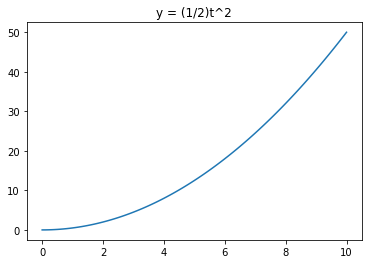

In [ ]:
import numpy as np
#Here, we grab all of the functions and tools from the numpy package and store them in a local variable called np.
#You can call that variable whatever you like, but 'np' is standard.

#numpy has arrays, which function similarly to python lists. 
a = np.array([1,2,3])
b = np.array([9,8,7])
#Be careful with syntax. The parentheses and brackets are both required!
print(a)

#Access elements from them just like you would a regular list
print(a[0])

#Element-wise operations are a breeze!
c = a + b
d = a - b
e = a * b
f = a / b

print(c)
print(d)
print(e)
print(f)
#This is different from MATLAB where you add a dot to get element wise operators.

#What about multi-dimensional arrays? Matrices!

#You just nest lists within lists! 
A = np.array( [[1,2,3], [4,5,6], [7,8,9]] )
B = np.array( [[1,1,1], [2,2,2], [3,3,3]] )

#Then matrix multlication
C = np.matmul(A,B)
 
print(C)

#Or determinants:
print(np.linalg.det(A))


#Now, let's use numpy for something essential for you: Numeric Integration

#Define the function you want to integrate....
#dy/dt = t:
def deriv(y,t):
    return t
#Note this doesn't use y in the return. That is okay, but we need to include it just to satisfy the function we will use.

#Set your initial or boundary condition
IC = 0

#Give the number of points to evaluate the integration
start_time = 0
end_time = 10
num_times = 101
times = np.linspace(start_time, end_time, num_times)

from scipy.integrate import odeint
integrated_func = odeint(deriv,IC,times)

#Can we plot the result? You betcha. Just import a new package
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact

plt.plot(times, integrated_func)
plt.title("y = (1/2)t^2")
#Very similar to MATLAB!

## 1.3.5 Additional Resources
* If you still feel VERY lost: [Code Academy](https://www.codecademy.com/learn/learn-python)

* If you want a good reference site: [Official Python Reference](https://docs.python.org/3/reference/)

* If you want to learn python robustly: [Learn Python the Hard Way](https://learnpythonthehardway.org/book/)

* Feel free to contact me at: **jgerace (at) nd (dot) edu**


# 1.4 Python Numeric Integration Revisited

## 1.4.1 Sidenotes

### 1.4.1.1 Code Academy Sidenote

* https://www.codecademy.com/learn/learn-python

### 1.4.1.2 Markdown/Latex Sidenote

Jupyter-notebooks are very convenient because they include these markdown blocks to include discussion of the material.

Programs like Microsoft Word are examples of a "What you see is what you get" editor. In Markdown, you use characters and symbols to format your text, and then actually compile them.

For instance, I've been making liberal use of the header feature using the '#' pound/hashtag symbol. **Double click on this cell to see how I'm creating the text below.**

# 1.4 First Header

## 1.4.1 Second Header

### 1.4.1.1 Tertiary Header

#### 1.4.1.1.1 Etc

* Bullet Point
* Bullet Point 2
* Etc.

**Bolded Text**

_Italicized Text_

Those are a couple examples of some basic formatting. You can see more examples throughout this tutorial. The sidenote above has an example of a link, while there are examples of a chart, and a photo below. Take a look and see if you can reproduce it on your own!

For further reference: [Github's Markdown Guide](https://guides.github.com/features/mastering-markdown/)

### 1.4.1.2 Latex Side Note

A big included feature in Jupyter-notebook markdown blocks is that you have the ability to include LaTeX formatted text as well. 

LaTeX (pronounced "La-tech") is similar to a markdown language in and of itself (it is not What-You-See-Is-What-You-Get). It is considerably more feature-full than markdown, but also has a bigger learning curve. I recommend that you use it just for math, as Markdown can't provide Math formatting.

* Start latex formatting with '\$\$' and end it with another '\$\$'
$$ math goes here $$

* All alphabetic characters are included in a LateX math statement is intended to be a variable, and is italicized. Basic math is very intuitive due to this.

$$ y = mx + b $$

* As soon as you get to fractions, you have to learn some LaTeX commands. Here we'll use the '\frac{}{}' command

$$ \frac{3}{5} $$

* I prefer creating equations in LaTeX to word in large part due to symbols. Most greek letters can be added with the '\letter' command. For instance '\lambda'

$$ \lambda \leq \pi + \Pi $$

* Most common functions are included as operators in LaTeX:

$$ \log_b(a) = \frac{\log(a)}{\log(a)} $$

Just that should be enough to cover most of the math you'll need in this course. Don't feel like you _have_ to use LaTeX. It is also acceptable to do your work out (neatly) on paper and include a photo.

## 1.4.2 Hare and Lynx Example

### 1.4.2.1 Adapted from [Dr. Kantor's Notes](https://github.com/jckantor/CBE30338/blob/master/notebooks/HareLynx/Hare%20and%20Lynx%20Population%20Dynamics.ipynb) 

### 1.4.2.2 Introduction
We'd like to model the number of Hares and Lynx in a certain population of animals. 
![](http://boredomtherapy.com/wp-content/uploads/2015/12/14-canadian-lynx-paws-cute.jpg)
![](http://www.cbc.ca/kidscbc2/content/contests/cute_snowshoe1.jpg)

As cute as that Lynx is, it will prey on the Hare to the exclusion of all other animals if possible. This means the population levels of the Lynx and Hare are intrinsically related, see the pelt trading data for the Hudson's Bay Company:

![](MainLynx.jpg)

### 1.4.2.3 Modeling

We can start with the basic equation of: change = in - out

$$
\frac{dH}{dt} = (Hare Birth Rate) - (Hare Death Rate) \\
\frac{dL}{dt} = (Lynx Birth Rate) - (Lynx Death Rate)
$$

#### 1.4.2.3.1 Relevant Parameters

| Parameter | Symbol | Value |
| - | :----: | :---: |
| Lynx/Hare Predation Rate | $a$ | 3.2 |
| Lynx/Hare Conversion | $b$ | 0.6 |
| Lynx/Hare Michaelis Constant| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare Reproduction Rate | $r$ | 1.6 |

#### 1.4.2.3.2 Model Equations
These parameters can be used to form a model:

$$
\frac{dH}{dt} = rH(1 - \frac{H}{k}) - \frac{aHL}{c + H}  \\
\frac{dL}{dt} = a \frac{bHL}{c + H} - d*L
$$

The focus of this tutorial is not on the development of these model equations, but do review the equations and try to make sense of them. It can help you in debugging steps later should you have an error.

### 1.4.2.4 Programming and Plotting

#### 1.4.2.4.1 Step 1: Initialization

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### 1.4.2.4.2 Step 2: Default Parameter Values

In [ ]:
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

#### 1.4.2.4.3 Step 3: Define the differential equations

In [ ]:
def deriv(t, y):
    H, L = y
    dHdt =  r*H*(1-H/k) - a*H*L/(c+H)
    dLdt = b*a*H*L/(c+H) - d*L
    return [dHdt, dLdt]

#### 1.4.2.4.4 Step 4: Integrate Differential Equations

In [ ]:
t = np.linspace(0, 70, 500)                             # time grid
IC = [20, 20]                                           # initial conditions for H and L
soln = solve_ivp(deriv, (t[0], t[-1]), IC, t_eval=t)    # compute solution
H, L = soln.y                                           # unpack solution 

#### 1.4.2.4.5 Step 5: Plot 

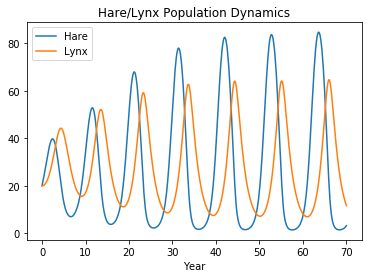

In [ ]:
plt.plot(t, H, t,  L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare', 'Lynx'])

If you have more than one thing to plot, we can make use of the subplot feature

Text(0.5,0,'Hare')

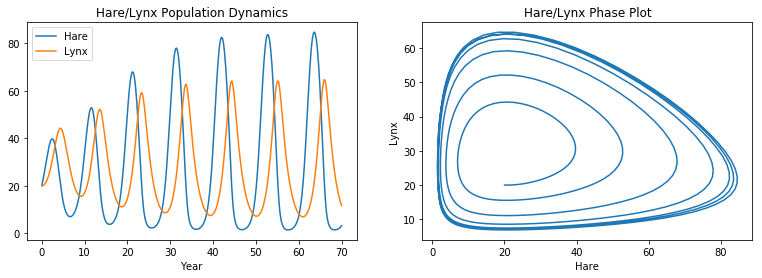

In [ ]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(t, H, t, L)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare', 'Lynx'])

plt.subplot(1, 2, 2)
plt.plot(H, L)
plt.title('Hare/Lynx Phase Plot')
plt.ylabel('Lynx')
plt.xlabel('Hare')